In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
#To load datasets
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


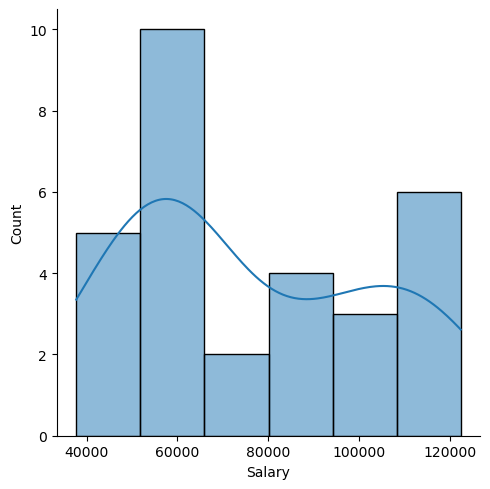

In [7]:
sns.displot(df['Salary'],kde=True)

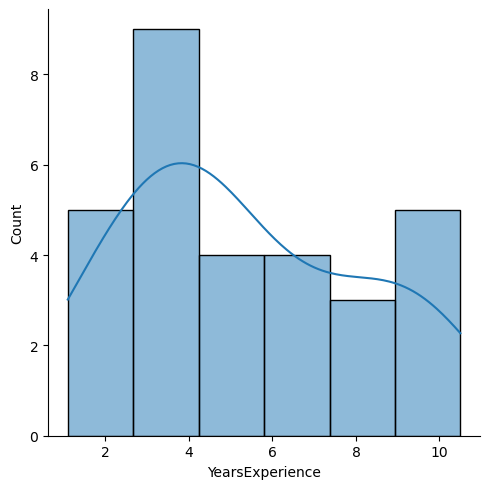

In [8]:
sns.displot(df['YearsExperience'],kde=True)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

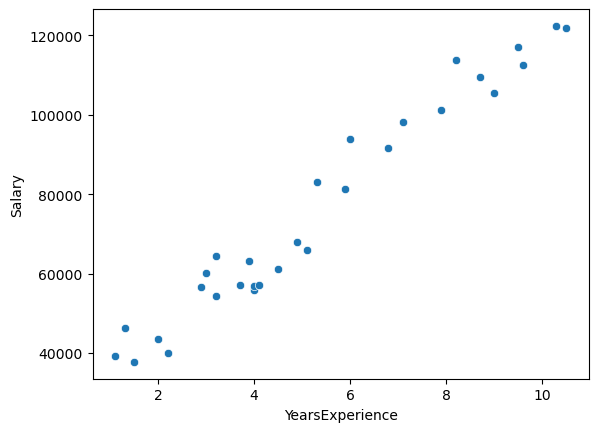

In [9]:
# scatterplot of input variable i.e.,years_experience Vs. output variable i.e., salary
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

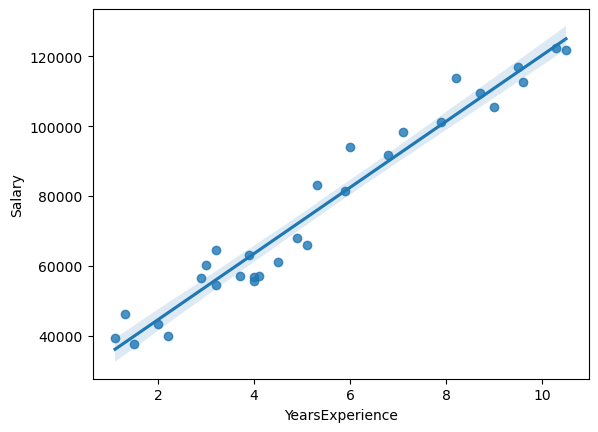

In [10]:
# scatterplot wirh regression of input variable i.e.,years_experience Vs. output variable i.e., salary
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [12]:
model = smf.ols('Salary~ YearsExperience', data = df).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        18:18:43   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
 model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [15]:
predicted_salary = model.predict(df.YearsExperience)
pred_df = pd.DataFrame({'Actual_salary' : df.Salary, 'Predicted_salary' : predicted_salary})
pred_df

,Actual_salary,Predicted_salary
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306
5,56642.0,53197.090931
6,60150.0,54142.087163
7,54445.0,56032.079627
8,64445.0,56032.079627
9,57189.0,60757.060788


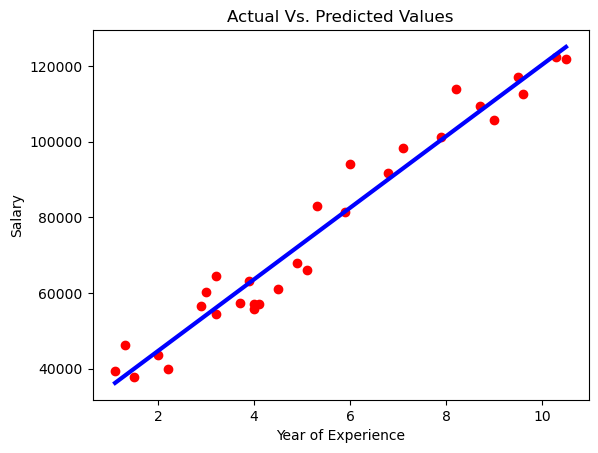

In [16]:
# Plotting Actual Vs. Predicted Values
plt.scatter(df.YearsExperience, df.Salary,  color='red')
plt.plot(df.YearsExperience, predicted_salary, color='blue', linewidth=3)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
from sklearn import metrics
print("Mean Absolute Error",metrics.mean_absolute_error(df.Salary,predicted_salary))
print("Mean Squared Error",metrics.mean_squared_error(df.Salary,predicted_salary))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(df.Salary,predicted_salary)))
print("R^2 Score :            ", metrics.r2_score(df.Salary, predicted_salary))

Mean Absolute Error 4644.20128944354
Mean Squared Error 31270951.72228097
Root Mean Squared Error 5592.043608760662
R^2 Score :             0.9569566641435086


### Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

p-value from the test: below 0.05 generally means non-normal: 0.4279759880058132
Residuals are normally distributed


C:\Users\HP\AppData\Local\Temp\ipykernel_13728\3951660044.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


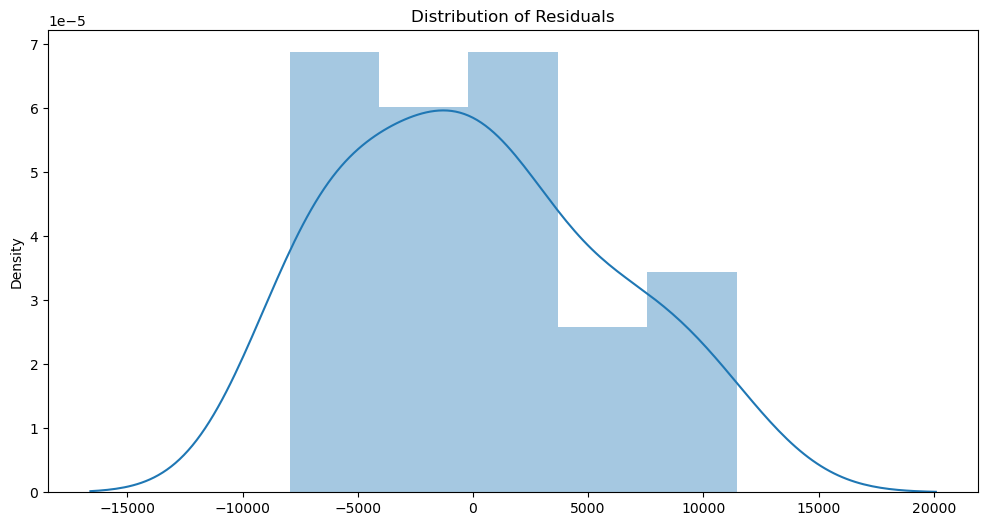

In [18]:
from statsmodels.stats.diagnostic import normal_ad
residuals = df.Salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        18:20:41   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#Building model with Logarithmic Transformation
data=pd.DataFrame.copy(df)
data['log_YearsExperience'] = np.log(df['YearsExperience'])
data

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457
5,2.9,56642.0,1.064711
6,3.0,60150.0,1.098612
7,3.2,54445.0,1.163151
8,3.2,64445.0,1.163151
9,3.7,57189.0,1.308333


In [21]:
#model create
log_model = smf.ols('Salary~ log_YearsExperience', data = data).fit()

In [22]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           3.25e-13
Time:                        18:21:58   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_YearsExperience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
log_model.params

Intercept              14927.97177
log_YearsExperience    40581.98796
dtype: float64

In [24]:
predicted_salary = log_model.predict(data.log_YearsExperience)
pred_df = pd.DataFrame({'Actual_salary' : data.Salary, 'Predicted_salary' : predicted_salary})
pred_df

,Actual_salary,Predicted_salary
0,39343.0,18795.848339
1,46205.0,25575.235192
2,37731.0,31382.551905
3,43525.0,43057.262306
4,39891.0,46925.138875
5,56642.0,58136.050079
6,60150.0,59511.842441
7,54445.0,62130.943929
8,64445.0,62130.943929
9,57189.0,68022.718504


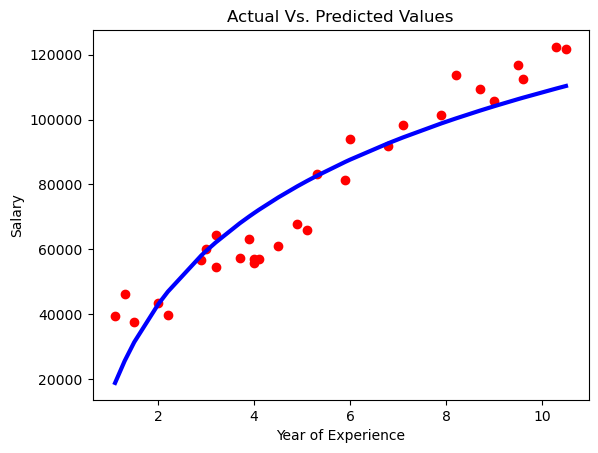

In [25]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data.YearsExperience, data.Salary,  color='red')
plt.plot(data.YearsExperience, predicted_salary, color='blue', linewidth=3)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [26]:
#Finding errors 
from sklearn import metrics
print("Mean Absolute Error",metrics.mean_absolute_error(data.Salary,predicted_salary))
print("Mean Squared Error",metrics.mean_squared_error(data.Salary,predicted_salary))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(data.Salary,predicted_salary)))
print("R^2 Score :            ", metrics.r2_score(data.Salary, predicted_salary))

Mean Absolute Error 8443.584664486356
Mean Squared Error 106149618.72183888
Root Mean Squared Error 10302.893706228308
R^2 Score :             0.8538888828756968


p-value from the test: below 0.05 generally means non-normal: 0.4374194094941206
Residuals are normally distributed


C:\Users\HP\AppData\Local\Temp\ipykernel_13728\3816070076.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


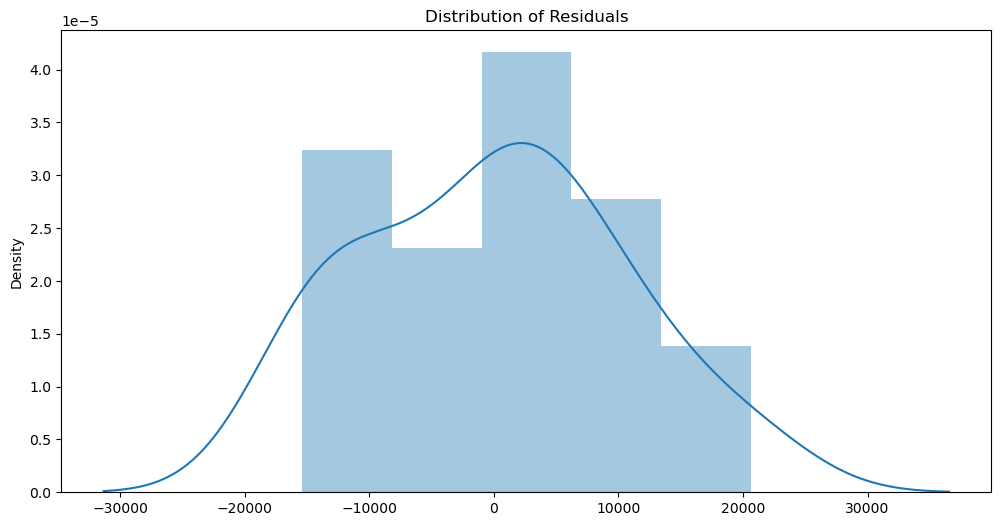

In [27]:
#Checking Normality of Residuals Using the Anderson-Darling test for normal distribution
from statsmodels.stats.diagnostic import normal_ad
residuals = data.Salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [28]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           3.25e-13
Time:                        18:24:00   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_YearsExperience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Building with Exponential Transformation

In [29]:
data['log_Salary'] = np.log(df['Salary'])
data

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906
5,2.9,56642.0,1.064711,10.944506
6,3.0,60150.0,1.098612,11.004597
7,3.2,54445.0,1.163151,10.904946
8,3.2,64445.0,1.163151,11.073567
9,3.7,57189.0,1.308333,10.954117


In [30]:
#creating a model
exp_model = smf.ols('log_Salary~ YearsExperience', data = data).fit()

In [31]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           7.03e-18
Time:                        18:26:36   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
exp_model.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [33]:
predicted_salary = exp_model.predict(data.YearsExperience)
pred_df = pd.DataFrame({'Actual_salary' : data.log_Salary, 'Predicted_salary' : predicted_salary})
pred_df

,Actual_salary,Predicted_salary
0,10.580073,10.645400
1,10.740843,10.670491
2,10.538237,10.695581
3,10.681091,10.758308
4,10.593906,10.783398
5,10.944506,10.871215
6,11.004597,10.883761
7,10.904946,10.908851
8,11.073567,10.908851
9,10.954117,10.971578


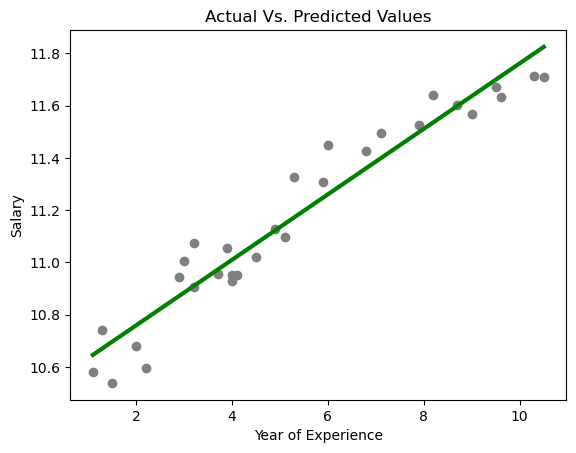

In [34]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data.YearsExperience, data.log_Salary,  color='grey')
plt.plot(data.YearsExperience, predicted_salary, color='green', linewidth=3)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [35]:
from sklearn import metrics
print("Mean Absolute Error",metrics.mean_absolute_error(data.log_Salary,predicted_salary))
print("Mean Squared Error",metrics.mean_squared_error(data.log_Salary,predicted_salary))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(data.log_Salary,predicted_salary)))
print("R^2 Score :            ", metrics.r2_score(data.log_Salary, predicted_salary))

Mean Absolute Error 0.07981492426092208
Mean Squared Error 0.00894431117203029
Root Mean Squared Error 0.0945743684728071
R^2 Score :             0.9319671194084195


In [36]:
pred_df = pd.DataFrame({'Actual': np.exp(data.log_Salary), 'Predicted': np.exp(predicted_salary)})
pred_df

,Actual,Predicted
0,39343.0,41998.957468
1,46205.0,43066.066794
2,37731.0,44160.289228
3,43525.0,47019.029189
4,39891.0,48213.688474
5,56642.0,52639.142472
6,60150.0,53303.675386
7,54445.0,54658.014935
8,64445.0,54658.014935
9,57189.0,58196.330788


### Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

p-value from the test: below 0.05 generally means non-normal: 0.33698612349865015
Residuals are normally distributed


C:\Users\HP\AppData\Local\Temp\ipykernel_13728\1430799165.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


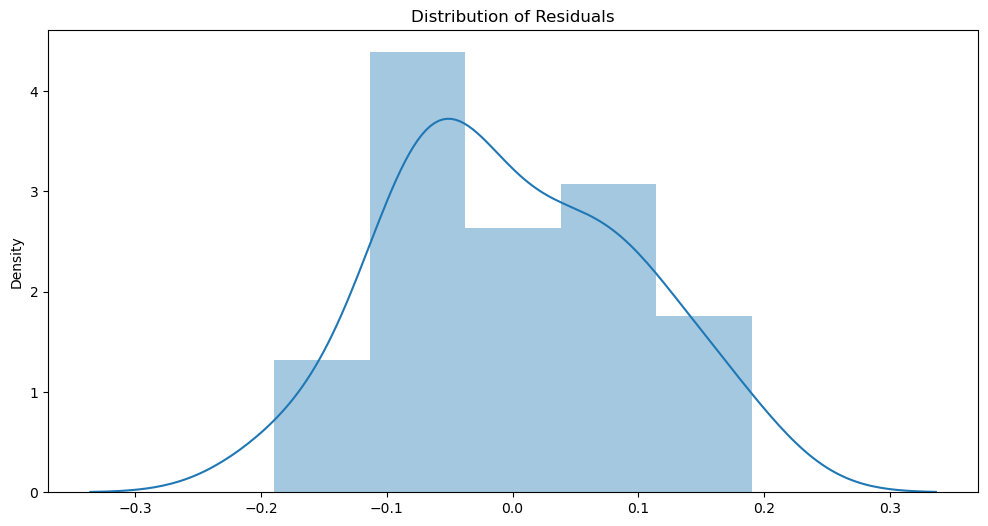

In [37]:
from statsmodels.stats.diagnostic import normal_ad
residuals = data.log_Salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [39]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           7.03e-18
Time:                        18:35:39   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""